# problema com 3 classes

## 1. Aquisição de dados:

Foi escolhido o dataset "Portuguese Tweets for Sentiment Analysis".
Disponível em https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis.

Training datasets:

- 50k, 100k, 200k, 300k, 400k, 500k positive and negative tweets without any theme
- 50k positive and negative tweets with political tweets
- 100k positive, negative and neutral tweets without any theme

Test datasets:

- 5k positive and negative tweets without any theme
- 5k positive and negative tweets with political tweets
- 5k positive, negative and neutral tweets without theme

All of them have an equal number of instances between classes. Their sentiment labels were transformed as follow:

- Negative label: 0
- Positive label: 1
- Neutral label: 2

## 2. Visualização dos dados:

In [19]:
import pandas as pd
import seaborn

In [20]:
training_data = pd.read_csv('./data/TrainingDatasets/Train3Classes.csv', sep=';')
test_data = pd.read_csv('./data/TestDatasets/Test3Classes.csv', sep=';')

In [21]:
training_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   tweet_text  100000 non-null  object
 2   tweet_date  100000 non-null  object
 3   sentiment   100000 non-null  int64 
 4   query_used  100000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4999 non-null   int64 
 1   tweet_text  4999 non-null   object
 2   tweet_date  4999 non-null   object
 3   sentiment   4999 non-null   int64 
 4   query_used  4999 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


(None, None)

In [22]:
training_data.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [23]:
training_data['sentiment'].value_counts()

1    33334
2    33333
0    33333
Name: sentiment, dtype: int64

In [24]:
test_data.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [25]:
test_data['sentiment'].value_counts()

1    1667
2    1666
0    1666
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'query used - training data')

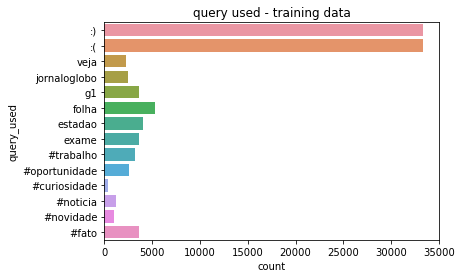

In [26]:
ax = seaborn.countplot(y='query_used', data=training_data)
ax.set_title('query used - training data')

Text(0.5, 1.0, 'query used - testing data')

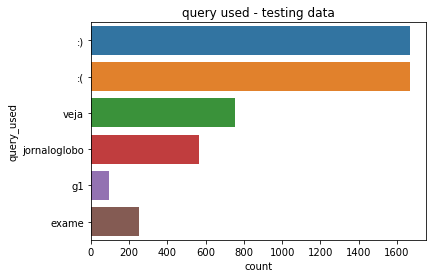

In [27]:
ax = seaborn.countplot(y='query_used', data=test_data)
ax.set_title('query used - testing data')

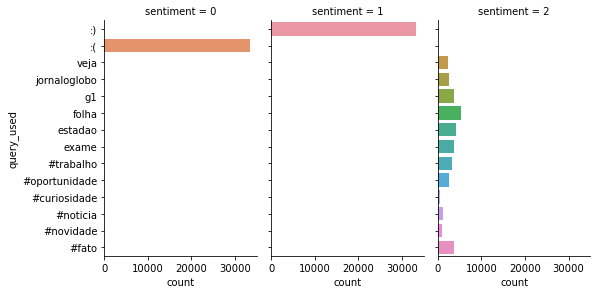

In [28]:
seaborn.catplot(y="query_used", col="sentiment", data=training_data, kind="count", height=4, aspect=.7);

## 3. Pré-processamento e Processamento dos dados:

### pré-processamento

In [29]:
training_tweets = training_data.loc[:, 'tweet_text'].values
training_labels = training_data.loc[:, 'sentiment'].values

testing_tweets = test_data.loc[:, 'tweet_text'].values
testing_labels = test_data.loc[:, 'sentiment'].values

In [30]:
training_labels[0:5], testing_labels[0:5]

(array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1]))

In [31]:
import string
import nltk
from nltk.tokenize import TweetTokenizer
import re


tokenizer = TweetTokenizer(preserve_case=False)

# baixando as stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# baixando o stemmer 
nltk.download('rslp')
from nltk.stem import RSLPStemmer
stemmer = nltk.stem.RSLPStemmer()

# tratamento de emoticons
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/amanda/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [32]:
# source: https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d

# Converting emojis to words
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text
    
# Converting emoticons to words    
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

In [33]:
def preprocessing(tweets):
    progress = 1
    total = len(tweets)
    processed_tweets = []
    
    for tweet in tweets:
        print('[ ' + str(progress) + ' / ' + str(total) + ' ]', end='\r')
        #print(tweet)
        processed_tweet = []
        # remove urls
        tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet)
        # remove hashtags
        tweet = re.sub(r'#[\w]*', '', tweet)
        # remove @
        tweet = re.sub(r'@[\w]*', '', tweet)
        # 'translate' emojis/emoticons
        tweet = convert_emojis(tweet)
        tweet = convert_emoticons(tweet)
        
        tweet_tokens = tokenizer.tokenize(tweet)
        
        for word in tweet_tokens: 
            if (word not in stopwords and word not in string.punctuation):
                stem_word = stemmer.stem(word)
                processed_tweet.append(stem_word)
        
        #print(processed_tweet, end='\n\n')
        processed_tweets.append(processed_tweet)
        
        progress += 1

    return processed_tweets

In [34]:
tweets_sample = training_tweets[0:3]
sample = preprocessing(tweets_sample)
tweets_sample[0], sample[0]

('@Laranjito76 A pessoa certa para isso seria o vale e azevedo :)',
 ['pesso', 'cert', 'val', 'azeved', 'happy_face_or_smiley'])

In [35]:
testing_tweets_ = preprocessing(testing_tweets)

In [36]:
training_tweets_ = preprocessing(training_tweets)

In [37]:
def untokenize_tweets(tweet_tokens):
    untokenized_tweets = []
    for tweet in tweet_tokens:
        new_tweet = ' '.join(tweet)
        untokenized_tweets.append(new_tweet)
        
    return untokenized_tweets

In [38]:
training_tweets__ = untokenize_tweets(training_tweets_)
testing_tweets__ = untokenize_tweets(testing_tweets_)

In [39]:
training_tweets__[0:3], testing_tweets__[0:3]

(['pesso cert val azeved happy_face_or_smiley',
  'mim precis contr happy_face_or_smiley vem chuv vem boa dispos happy_face_or_smiley',
  'vou faz vide hoj ... pens fal pouc sobr nov met csg sobr pagin algu sugesta quer fal sobr alg cenari nacion laughing_big_grin_or_laugh_with_gl'],
 ['obrig happy_face_or_smiley',
  'vai pa put par happy_face_or_smiley',
  'qu descont 14/08 confusion white_medium_starwhite_medium_starwhite_medium_starwhite_medium_starwhite_medium_st globe_with_merid conf link ➔ » compartilh « encontr ofert cupom procur preocup wink_or_smirk cri pagin ofert cupom atual di happy_face_or_smiley'])

## 4. Métodos

### extração de features

In [40]:
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer
)

In [41]:
# bow: BAG OF WORDS
bow_vectorizer = CountVectorizer()
# fit on training data
bow_vectorizer.fit_transform(training_tweets__)

# tf-idf: TERM FREQUENCY - INVERSE DOC FREQUENCY
tfidf_vectorizer = TfidfVectorizer()
# fit on training data
tfidf_vectorizer.fit_transform(training_tweets__)

<100000x37504 sparse matrix of type '<class 'numpy.float64'>'
	with 811367 stored elements in Compressed Sparse Row format>

### 4.1 regressão logística com BOW

In [66]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve

In [102]:
bow_train = bow_vectorizer.transform(training_tweets__)
bow_test = bow_vectorizer.transform(testing_tweets__)

In [103]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(bow_train, training_labels)
prediction = logreg.predict(bow_test)
print("regressão logística com bow - f1 score: {}".format(f1_score(testing_labels, prediction, average = 'weighted')))

regressão logística com bow - f1 score: 0.9842023082262324


In [104]:
confusion_matrix(testing_labels, prediction)

array([[1660,    0,    6],
       [   3, 1595,   69],
       [   0,    1, 1665]])

### 4.2 regressão logística com TF-IDF

In [105]:
tfidf_train = tfidf_vectorizer.transform(training_tweets__)
tfidf_test = tfidf_vectorizer.transform(testing_tweets__)

In [106]:
logreg2 = LogisticRegression(max_iter=2000)
logreg2.fit(tfidf_train, training_labels)
prediction2 = logreg2.predict(tfidf_test)
print("regressão logística com tf-idf - f1 score: {}".format(f1_score(testing_labels, prediction2, average = 'weighted')))

regressão logística com tf-idf - f1 score: 0.982992695573111


In [107]:
confusion_matrix(testing_labels, prediction2)

array([[1659,    0,    7],
       [   6, 1590,   71],
       [   0,    1, 1665]])

### 4.3 naive bayes com BOW

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [109]:
model = MultinomialNB()
model.fit(bow_train, training_labels)
prediction3 = model.predict(bow_test)
print("multinomial naive bayes com bow - f1 score: {}".format(f1_score(testing_labels, prediction3, average = 'weighted')))

multinomial naive bayes com bow - f1 score: 0.9743904842919314


In [110]:
confusion_matrix(testing_labels, prediction3)

array([[1654,   10,    2],
       [  41, 1617,    9],
       [  16,   50, 1600]])

### 4.4 naive bayes com TF-IDF

In [111]:
model = MultinomialNB()
model.fit(tfidf_train, training_labels)
prediction4 = model.predict(tfidf_test)
print("multinomial naive bayes com tf-idf - f1 score: {}".format(f1_score(testing_labels, prediction4, average = 'weighted')))

multinomial naive bayes com tf-idf - f1 score: 0.9390937889142988


In [112]:
confusion_matrix(testing_labels, prediction4)

array([[1561,   89,   16],
       [  96, 1541,   30],
       [  21,   53, 1592]])